# Numerical bifurcation analysis of SOSP

We want to know if there are reasonable limits on $\gamma$ and the relative harmony heights of two (for now) harmony peaks. It's clear that $\gamma$ should be positive, otherwise it changes the nature of the harmony function. The interesting range for the height of the second harmony peak $h_1$ is 0 to 1, because any two harmony heights can be rescaled so that one of them equals one and the other is in that range.

I'll be using PyDSTool for this (http://www2.gsu.edu/~matrhc/PyDSTool.htm). I'll start with a 1D system.

In [19]:
import PyDSTool
import numpy as np
import matplotlib.pyplot as plt

# Naming the system
DSargs = PyDSTool.args(name='SOSP-1D')

# Parameters
#DSargs.pars = {'g': 0.25, 'h0': 1.0, 'h1': 0.5, 'euler': np.exp(1)}  # For now, just looking effect of gamma
DSargs.pars = {'g': 0.25, 'h0': 1.0, 'h1': 0.5}  # For now, just looking effect of gamma

# RHS of diff. eq.
DSargs.varspecs = {'x': '(-2*h0 / g) * exp(-x**2/g) * x + (-2*h1 / g) * exp(-(x-1)**2/g) * (x-1)'}

# Init. cond.
DSargs.ics = {'x': 0.75}

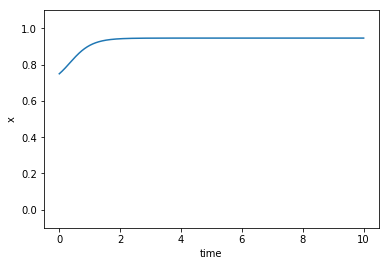

In [20]:
# Trying out just looking at a trajectory
DSargs.tdomain = [0, 10]  # set the range of integration.
ode = PyDSTool.Generator.Vode_ODEsystem(DSargs)  # an instance of the 'Generator' class.
traj = ode.compute('trajectory')
pd = traj.sample()  # Data for plotting

plt.plot(pd['t'], pd['x'])
plt.xlabel('time')
plt.ylabel('x')
plt.ylim([-0.1, 1.1])
plt.show()

First curve
Starting second curve
LP Point found 


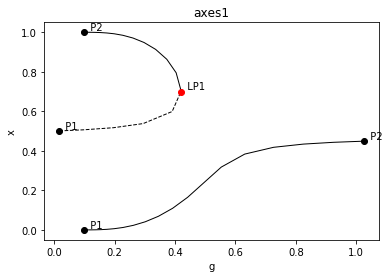

In [121]:
# Doing the bifurcation analysis as a function of gamma (g)
# Set init cond near a known fp.
ode.set(pars={'g': 0.1, 'h1': 0.9})  # lower bound for gamma
ode.set(ics={'x': 0.0})  # init. cond. for x

# Set up a continuation class from the ODE
PyCont = PyDSTool.ContClass(ode)
# 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs = PyDSTool.args(name='branch1', type='EP-C')
# control parameter(s) (it should be among those specified in DSargs.pars)
PCargs.freepars = ['g']
# The following 3 parameters are set after trial-and-error
PCargs.MaxNumPoints = 20#1500
PCargs.MaxStepSize = 1e-1
PCargs.MinStepSize = 1e-7
PCargs.StepSize = 1e-2
PCargs.FuncTol = 1e-8
PCargs.TestTol = 1e-8
PCargs.VarTol = 1e-8
# detect limit points / saddle-node bifurcations
PCargs.LocBifPoints = 'all'  #['LP', 'BP']
# to tell unstable from stable branches
PCargs.SaveEigen = True

# Computing the bifucation diagram
print('First curve')
PyCont.newCurve(PCargs)
PyCont['branch1'].forward()
#PyCont['branch1'].backward()

# Other fps
print('Starting second curve')
PCargs = PyDSTool.args(name='branch2', type='EP-C', force=True)
PCargs.initpoint = {'x': 1.0, 'g': 0.1}  #'branch1:BP1'
#PCargs.initpoint = 'branch1:BP1'
PCargs.freepars = ['g']
PCargs.MaxNumPoints = 20
PCargs.MaxStepSize = 1e-1
PCargs.MinStepSize = 1e-7
PCargs.StepSize = 1e-2
PCargs.FuncTol = 1e-8
PCargs.TestTol = 1e-8
PCargs.VarTol = 1e-8
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
#PCargs.verbosity = 2
PyCont.newCurve(PCargs)
#PyCont['branch2'].forward()
PyCont['branch2'].backward()

PyCont.display(['g', 'x'], stability=True)
plt.show()

In [112]:
PyCont['branch1'].info()

PyCont curve branch1 (type EP-C)
Using model: SOSP-1D

Model Info
---------- 

  Variables : x
  Parameters: h1, g, h0

Continuation Parameters
----------------------- 

name  =  branch1
auxpars  =  []
freepars  =  ['g']
MaxNumPoints  =  20
MaxCorrIters  =  5
MaxTestIters  =  10
MaxStepSize  =  0.1
MinStepSize  =  1e-07
StepSize  =  0.1
VarTol  =  1e-08
FuncTol  =  1e-08
TestTol  =  1e-08
LocBifPoints  =  ['B', 'SP', 'BP', 'LP']
verbosity  =  1
ClosedCurve  =  50
SaveJacobian  =  False
SaveEigen  =  True
Corrector  =  <bound method Continuation._MoorePenrose of PyCont curve branch1 (type EP-C)>
UseAuto  =  False
StopAtPoints  =  []
SPOut  =  None


Special Points
-------------- 

P1, P2


In [113]:
print('Location of bifucation: {}'.format(PyCont['branch1'].getSpecialPoint('BP1')))

Location of bifucation: None


In [114]:
PyCont['branch2'].info()

PyCont curve branch2 (type EP-C)
Using model: SOSP-1D

Model Info
---------- 

  Variables : x
  Parameters: h1, g, h0

Continuation Parameters
----------------------- 

name  =  branch2
force  =  True
auxpars  =  []
freepars  =  ['g']
MaxNumPoints  =  20
MaxCorrIters  =  5
MaxTestIters  =  10
MaxStepSize  =  0.1
MinStepSize  =  1e-07
StepSize  =  0.09600000000000002
VarTol  =  1e-08
FuncTol  =  1e-08
TestTol  =  1e-08
LocBifPoints  =  ['B', 'SP', 'BP', 'LP']
verbosity  =  1
ClosedCurve  =  50
SaveJacobian  =  False
SaveEigen  =  True
Corrector  =  <bound method Continuation._MoorePenrose of PyCont curve branch2 (type EP-C)>
UseAuto  =  False
StopAtPoints  =  []
SPOut  =  None


Special Points
-------------- 

P1, P2, LP1
